In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder


In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model_singleLSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model_singleLSTM.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_singleLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
NUM_EPOCHS = 10
history = model_singleLSTM.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)


Epoch 1/10
391/391 [==============================] - 336s 859ms/step - loss: 0.3713 - accuracy: 0.8470 - val_loss: 0.5118 - val_accuracy: 0.7549
Epoch 2/10
391/391 [==============================] - 326s 835ms/step - loss: 0.3085 - accuracy: 0.8778 - val_loss: 0.4512 - val_accuracy: 0.7862
Epoch 3/10
391/391 [==============================] - 321s 821ms/step - loss: 0.2707 - accuracy: 0.8971 - val_loss: 0.4588 - val_accuracy: 0.8327
Epoch 4/10
391/391 [==============================] - 324s 828ms/step - loss: 0.2691 - accuracy: 0.8941 - val_loss: 0.4789 - val_accuracy: 0.8090
Epoch 5/10
391/391 [==============================] - 405s 1s/step - loss: 0.2728 - accuracy: 0.8931 - val_loss: 0.4517 - val_accuracy: 0.8080
Epoch 6/10
391/391 [==============================] - 469s 1s/step - loss: 0.1709 - accuracy: 0.9380 - val_loss: 0.4970 - val_accuracy: 0.8127
Epoch 7/10
391/391 [==============================] - 472s 1s/step - loss: 0.1661 - accuracy: 0.9380 - val_loss: 0.5327 - val_accu

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

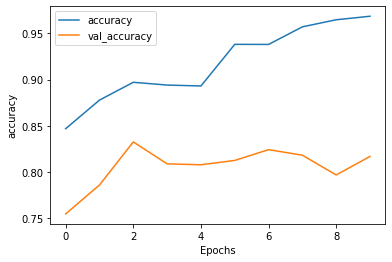

In [12]:
plot_graphs(history, 'accuracy')


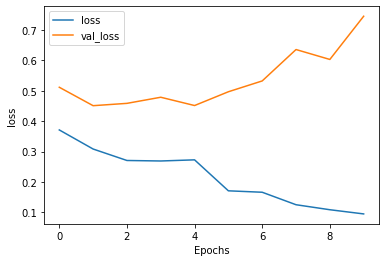

In [13]:
plot_graphs(history, 'loss')


### Multi Layer LSTM

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-tr

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 816s 2s/step - loss: 0.6079 - accuracy: 0.6716 - val_loss: 0.5624 - val_accuracy: 0.7001
Epoch 2/10
391/391 [==============================] - 573s 1s/step - loss: 0.4641 - accuracy: 0.7960 - val_loss: 0.5536 - val_accuracy: 0.7214
Epoch 3/10
391/391 [==============================] - 576s 1s/step - loss: 0.3759 - accuracy: 0.8458 - val_loss: 0.4317 - val_accuracy: 0.8205
Epoch 4/10
391/391 [==============================] - 574s 1s/step - loss: 0.2863 - accuracy: 0.8892 - val_loss: 0.4666 - val_accuracy: 0.8218
Epoch 5/10
391/391 [==============================] - 573s 1s/step - loss: 0.2095 - accuracy: 0.9233 - val_loss: 0.3973 - val_accuracy: 0.8494
Epoch 6/10
391/391 [==============================] - 570s 1s/step - loss: 0.1890 - accuracy: 0.9318 - val_loss: 0.4646 - val_accuracy: 0.8205
Epoch 7/10
391/391 [==============================] - 570s 1s/step - loss: 0.1379 - accuracy: 0.9538 - val_loss: 0.5304 - val_accuracy: 0.8202

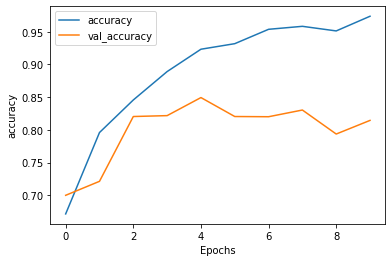

In [18]:
plot_graphs(history, 'accuracy')

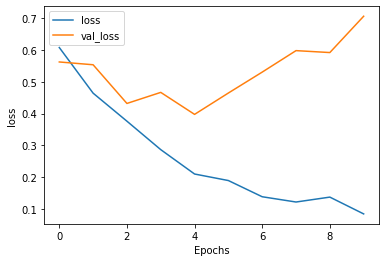

In [19]:
plot_graphs(history, 'loss')

### Multiple Layer Conv1D

In [20]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [22]:
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
NUM_EPOCHS = 10
history_conv = model_conv.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 52s 133ms/step - loss: 0.4452 - accuracy: 0.7771 - val_loss: 0.3047 - val_accuracy: 0.8776
Epoch 2/10
391/391 [==============================] - 52s 133ms/step - loss: 0.2193 - accuracy: 0.9187 - val_loss: 0.3016 - val_accuracy: 0.8783
Epoch 3/10
391/391 [==============================] - 52s 133ms/step - loss: 0.1664 - accuracy: 0.9398 - val_loss: 0.3316 - val_accuracy: 0.8750
Epoch 4/10
391/391 [==============================] - 52s 134ms/step - loss: 0.1327 - accuracy: 0.9520 - val_loss: 0.3635 - val_accuracy: 0.8697
Epoch 5/10
391/391 [==============================] - 54s 138ms/step - loss: 0.1052 - accuracy: 0.9638 - val_loss: 0.4417 - val_accuracy: 0.8640
Epoch 6/10
391/391 [==============================] - 54s 137ms/step - loss: 0.0871 - accuracy: 0.9709 - val_loss: 0.4889 - val_accuracy: 0.8610
Epoch 7/10
391/391 [==============================] - 54s 138ms/step - loss: 0.0662 - accuracy: 0.9791 - val_loss: 0.6041 - val_ac

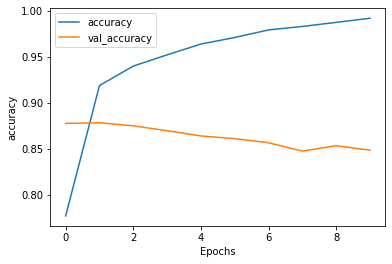

In [24]:
plot_graphs(history_conv, 'accuracy')

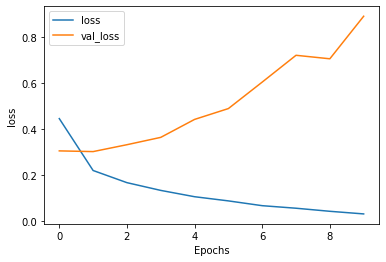

In [25]:
plot_graphs(history_conv, 'loss')

### Multiple Layer GRU

In [26]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 546,881
Trainable params: 546,881
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
NUM_EPOCHS = 10
history_gru = model_gru.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 228s 577ms/step - loss: 0.5400 - accuracy: 0.7097 - val_loss: 0.4268 - val_accuracy: 0.8134
Epoch 2/10
391/391 [==============================] - 224s 572ms/step - loss: 0.5329 - accuracy: 0.7361 - val_loss: 0.4820 - val_accuracy: 0.7695
Epoch 3/10
391/391 [==============================] - 222s 568ms/step - loss: 0.3386 - accuracy: 0.8590 - val_loss: 0.4733 - val_accuracy: 0.7975
Epoch 4/10
391/391 [==============================] - 223s 570ms/step - loss: 0.2643 - accuracy: 0.8948 - val_loss: 0.4111 - val_accuracy: 0.8278
Epoch 5/10
391/391 [==============================] - 223s 570ms/step - loss: 0.2262 - accuracy: 0.9133 - val_loss: 0.4297 - val_accuracy: 0.8283
Epoch 6/10
391/391 [==============================] - 221s 565ms/step - loss: 0.1936 - accuracy: 0.9278 - val_loss: 0.4552 - val_accuracy: 0.8250
Epoch 7/10
391/391 [==============================] - 223s 569ms/step - loss: 0.1639 - accuracy: 0.9413 - val_loss: 0.4959 -

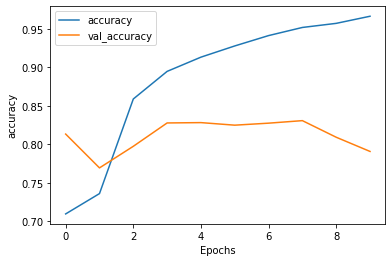

In [30]:
plot_graphs(history_gru, 'accuracy')

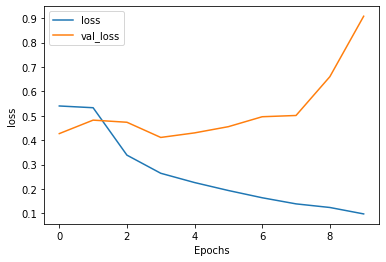

In [31]:
plot_graphs(history_gru, 'loss')